# Eksploracja danych biomedycznych
## Project
### Paulina Kowalik
#### 24.03.19

To run the project, you need pandas, matplotlib and seaborn. I used the newest versions available on 24.04.19. 

You also need to download the dataset, Global Terrorism Database, from https://www.kaggle.com/START-UMD/gtd, and place it in the directory above your repository. I used the *globalterrorismdb_0718dist.csv file*. 

First we start with importing the neccessary packages. 

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
plt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls


 There are some warnings because of importing various types of data from .csv file. Let's ignore them. 

In [2]:
import warnings
warnings.filterwarnings('ignore')

Now we can use panda to read the csv. I rename column names so that they're more friendly for use later. Let's use only the most essential columns: I listed them in the third line of the code below:

In [3]:
terror=pd.read_csv('../globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')
terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
terror=terror[['Year','Month','Day','Country', 'provstate', 'Region','city','latitude','longitude','suicide', 'AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

Now we can perform some elementary operations on the data to get interesting facts:

In [4]:
print('Most common attack type:',terror['AttackType'].value_counts().index[0])
print('Most common target:',terror['Target'].value_counts().index[0])
print('Maximum people wounded in an attack are:',int(terror['Wounded'].max()),'that took place in',terror.loc[terror['Killed'].idxmax()].Country)

Most common attack type: Bombing/Explosion
Most common target: Civilians
Maximum people wounded in an attack are: 8191 that took place in Iraq


Let's try matplotlib and seaborn to create the first plot and see the trend in terrorist attacks in the United States.

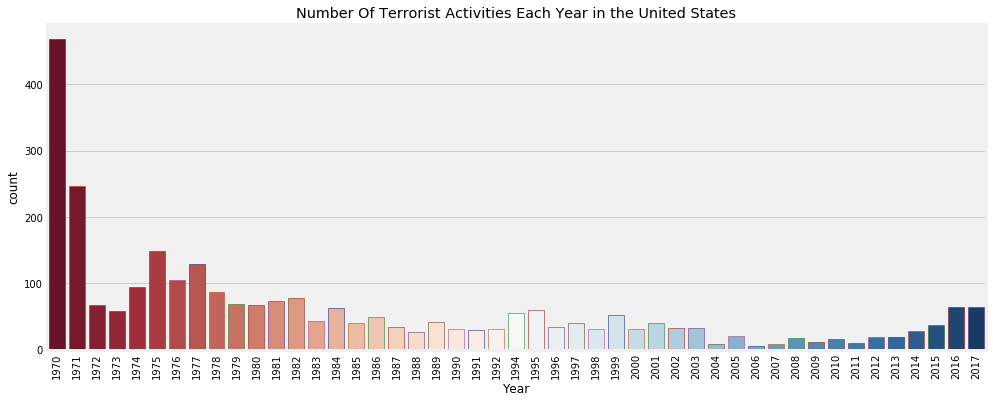

In [5]:

plt.subplots(figsize=(15,6))

sns.countplot('Year',data=terror.loc[terror['Country'] == 'United States'],palette="RdBu",edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year in the United States')
plt.show()

Now let's do the same but with the suicide attacks worldwide.

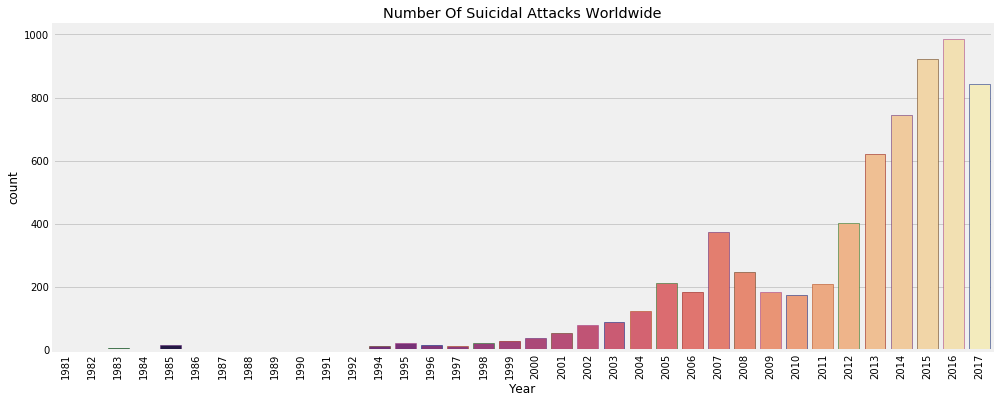

In [6]:

plt.subplots(figsize=(15,6))

sns.countplot('Year',data=terror.loc[terror['suicide'] == 1],palette="magma",edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Suicidal Attacks Worldwide')
plt.show()

It would be interesting to present them on a map. Let's try this using plotly. 

In [7]:
terror_filter = terror[terror['suicide'] == 1]
terror_filter = terror_filter.groupby(['Country'])['suicide'].count()
data =  dict(
        type = 'choropleth',
        locations = terror_filter.index,
        locationmode = 'country names',
        z = terror_filter.values,
        text = terror_filter.index,
        colorscale='Jet',
        marker=dict(line=dict(color='rgb(180,180,180)', width=0.5)),
        colorbar = {'title': 'No of incidents'})

layout = dict( title = 'No of suicidal incidents worldwide',
         geo = dict(showframe = False,
         projection = {'type' : 'mercator'}))

choromap3 = go.Figure(data = [data],layout=layout)
py.iplot(choromap3)

We can do the same with all the attacks in the US. It's possible to mark attack points on the map by their longitude and latitude and control their size basing on the number of the victims.

In [8]:
terror_usa = terror[(terror['Country'] == 'United States')]

terror_usa = terror_usa.sort_values(['Killed'], ascending = False)
terror_usa['Killed'] = terror_usa['Killed'].fillna(0).astype(int)
terror_usa['Wounded'] = terror_usa['Wounded'].fillna(0).astype(int)
terror_usa['text'] = 'Year: ' + terror_usa['Year'].astype(str) + '<br>' +\
                     terror_usa['Killed'].astype(str) + ' Killed, ' +\
                     terror_usa['Wounded'].astype(str) + ' Wounded'
data = dict(
    type = 'scattergeo',
    locationmode = 'USA-states',
    lon = terror_usa[terror_usa.Killed > 0]['longitude'],
    lat = terror_usa[terror_usa.Killed > 0]['latitude'],
    text = terror_usa[terror_usa.Killed > 0]['text'],
    mode = 'markers',
    name = 'Victims of Terror Attacks',
    hoverinfo = 'text',
    marker = dict(
        size = terror_usa['Killed'] ** 0.255 * 8,
        opacity = 0.95,
        color = 'rgb(255,140,148)'
        )
    )
layout = dict(
    title = 'Terrorist Attacks in the United States',
    showlegend = True,
    legend = dict(
        x = 0.85, y = 0.4
    ),
    geo = dict(
        scope = 'usa',
        projection = dict(type = 'albers usa'),
        showland = True,
        landcolor = 'rgb(245,245,220)',
        subunitwidth = 1,
        subunitcolor = 'rgb(217, 217, 217)',
        countrywidth = 1,
        countrycolor = 'rgb(217, 217, 217)',
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)')
    )

figure = dict(data = [data], layout = layout)
py.iplot(figure)